### Problem Statement

As obesity becomes a growing global concern, understanding its contributing factors is essential. Using a comprehensive dataset, this project aims to build a predictive model to estimate an individual's risk of obesity. The model will leverage features such as lifestyle habits, dietary patterns, and physiological measurements to provide actionable insights for preventative interventions.

---

### Data Description

| Column                          | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| **id**                          | Unique identifier for each entry.                                           |
| **Gender**                      | Gender of the individual (e.g., Male, Female).                              |
| **Age**                         | Age of the individual in years.                                             |
| **Height**                      | Height of the individual in meters.                                         |
| **Weight**                      | Weight of the individual in kilograms.                                      |
| **family_history_with_overweight** | Indicates whether the individual has a family history of being overweight (yes/no). |
| **FAVC**                        | Indicates if the individual frequently consumes high-calorie food (yes/no). |
| **FCVC**                        | Frequency of consumption of vegetables (numeric scale).                     |
| **NCP**                         | Number of main meals per day (numeric scale).                               |
| **CAEC**                        | Frequency of food consumption between meals (e.g., Sometimes, Frequently).  |
| **SMOKE**                       | Smoking habits (yes/no).                                                    |
| **CH2O**                        | Daily water consumption in liters.                                          |
| **SCC**                         | Indicates if the individual monitors their calorie consumption (yes/no).    |
| **FAF**                         | Frequency of physical activity per week (numeric scale).                    |
| **TUE**                         | Time spent on technology devices (numeric scale).                           |
| **CALC**                        | Frequency of alcohol consumption (e.g., Sometimes, Frequently, No).         |
| **MTRANS**                      | Mode of transportation (e.g., Public Transportation, Automobile).           |
| **NObeyesdad**                  | Target variable indicating obesity levels (e.g., Normal Weight, Overweight, Obesity Type I). |


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (LabelEncoder,PowerTransformer)
from sklearn.model_selection import (train_test_split)

In [2]:
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
train=pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)
LabelEncoder().fit_transform(train['NObeyesdad'].unique())

array([6, 1, 0, 4, 3, 5, 2])

In [5]:
train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [6]:
train.set_index(train['id'],inplace=True)
test.set_index(test['id'],inplace=True)

train.drop(columns='id',inplace=True)
test.drop(columns='id',inplace=True)

## Descriptive Analysis

In [7]:
# exploring the numerical variables
train.select_dtypes(np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


**Inferences :**
1. age of the people in this data is 14 to 61.
2. there are people who have weights more than 100 kgs

In [8]:
# exploring the categorical variables 
train.select_dtypes(object).describe().T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


**Inferences :**
1. there are more number of females in the data
2. there is a majourity of population with a family history of overweight.
3. majourity of the population have type 3 obesity

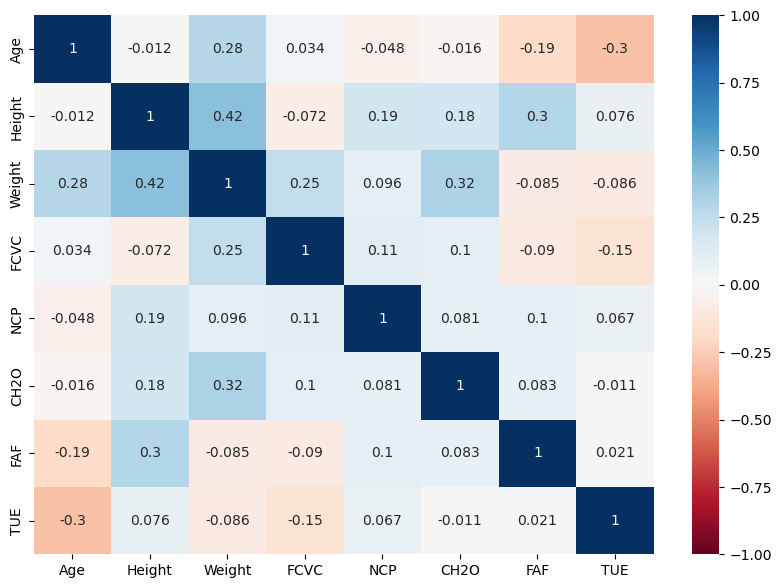

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data=train.corr(numeric_only=True),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

**Inferences :**
1. from the correlation plot we can see that as the age incerases the weights of the people increase which is obvious.
2. with increasing age people tends to sped less time on technology

## Univariate analysis

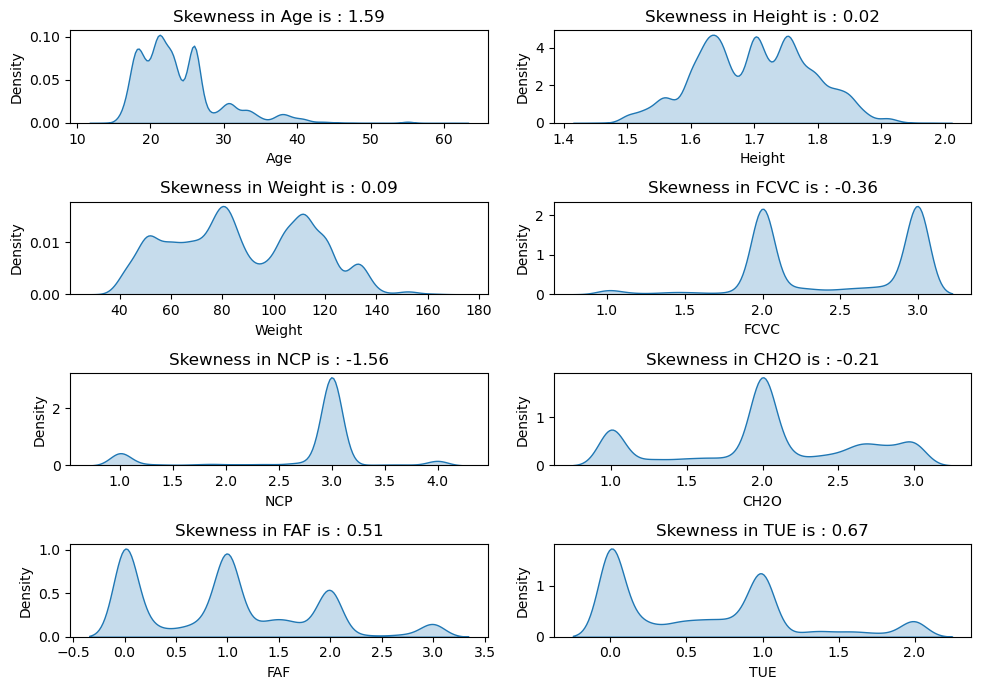

In [10]:
# exploring the distribution of the numerical columns
t=1
rows=4
cols=2
plt.figure(figsize=(10,7))
for i in train.select_dtypes(np.number).columns:
    plt.subplot(rows,cols,t)
    sns.kdeplot(data=train,x=i,fill=True)
    plt.title(f'Skewness in {i} is : {round(train[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Analysis of independent variables on the depdent variable

C:\Users\HP\AppData\Local\Temp\ipykernel_26912\1768111296.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train,x=i,fill=True,hue='NObeyesdad')


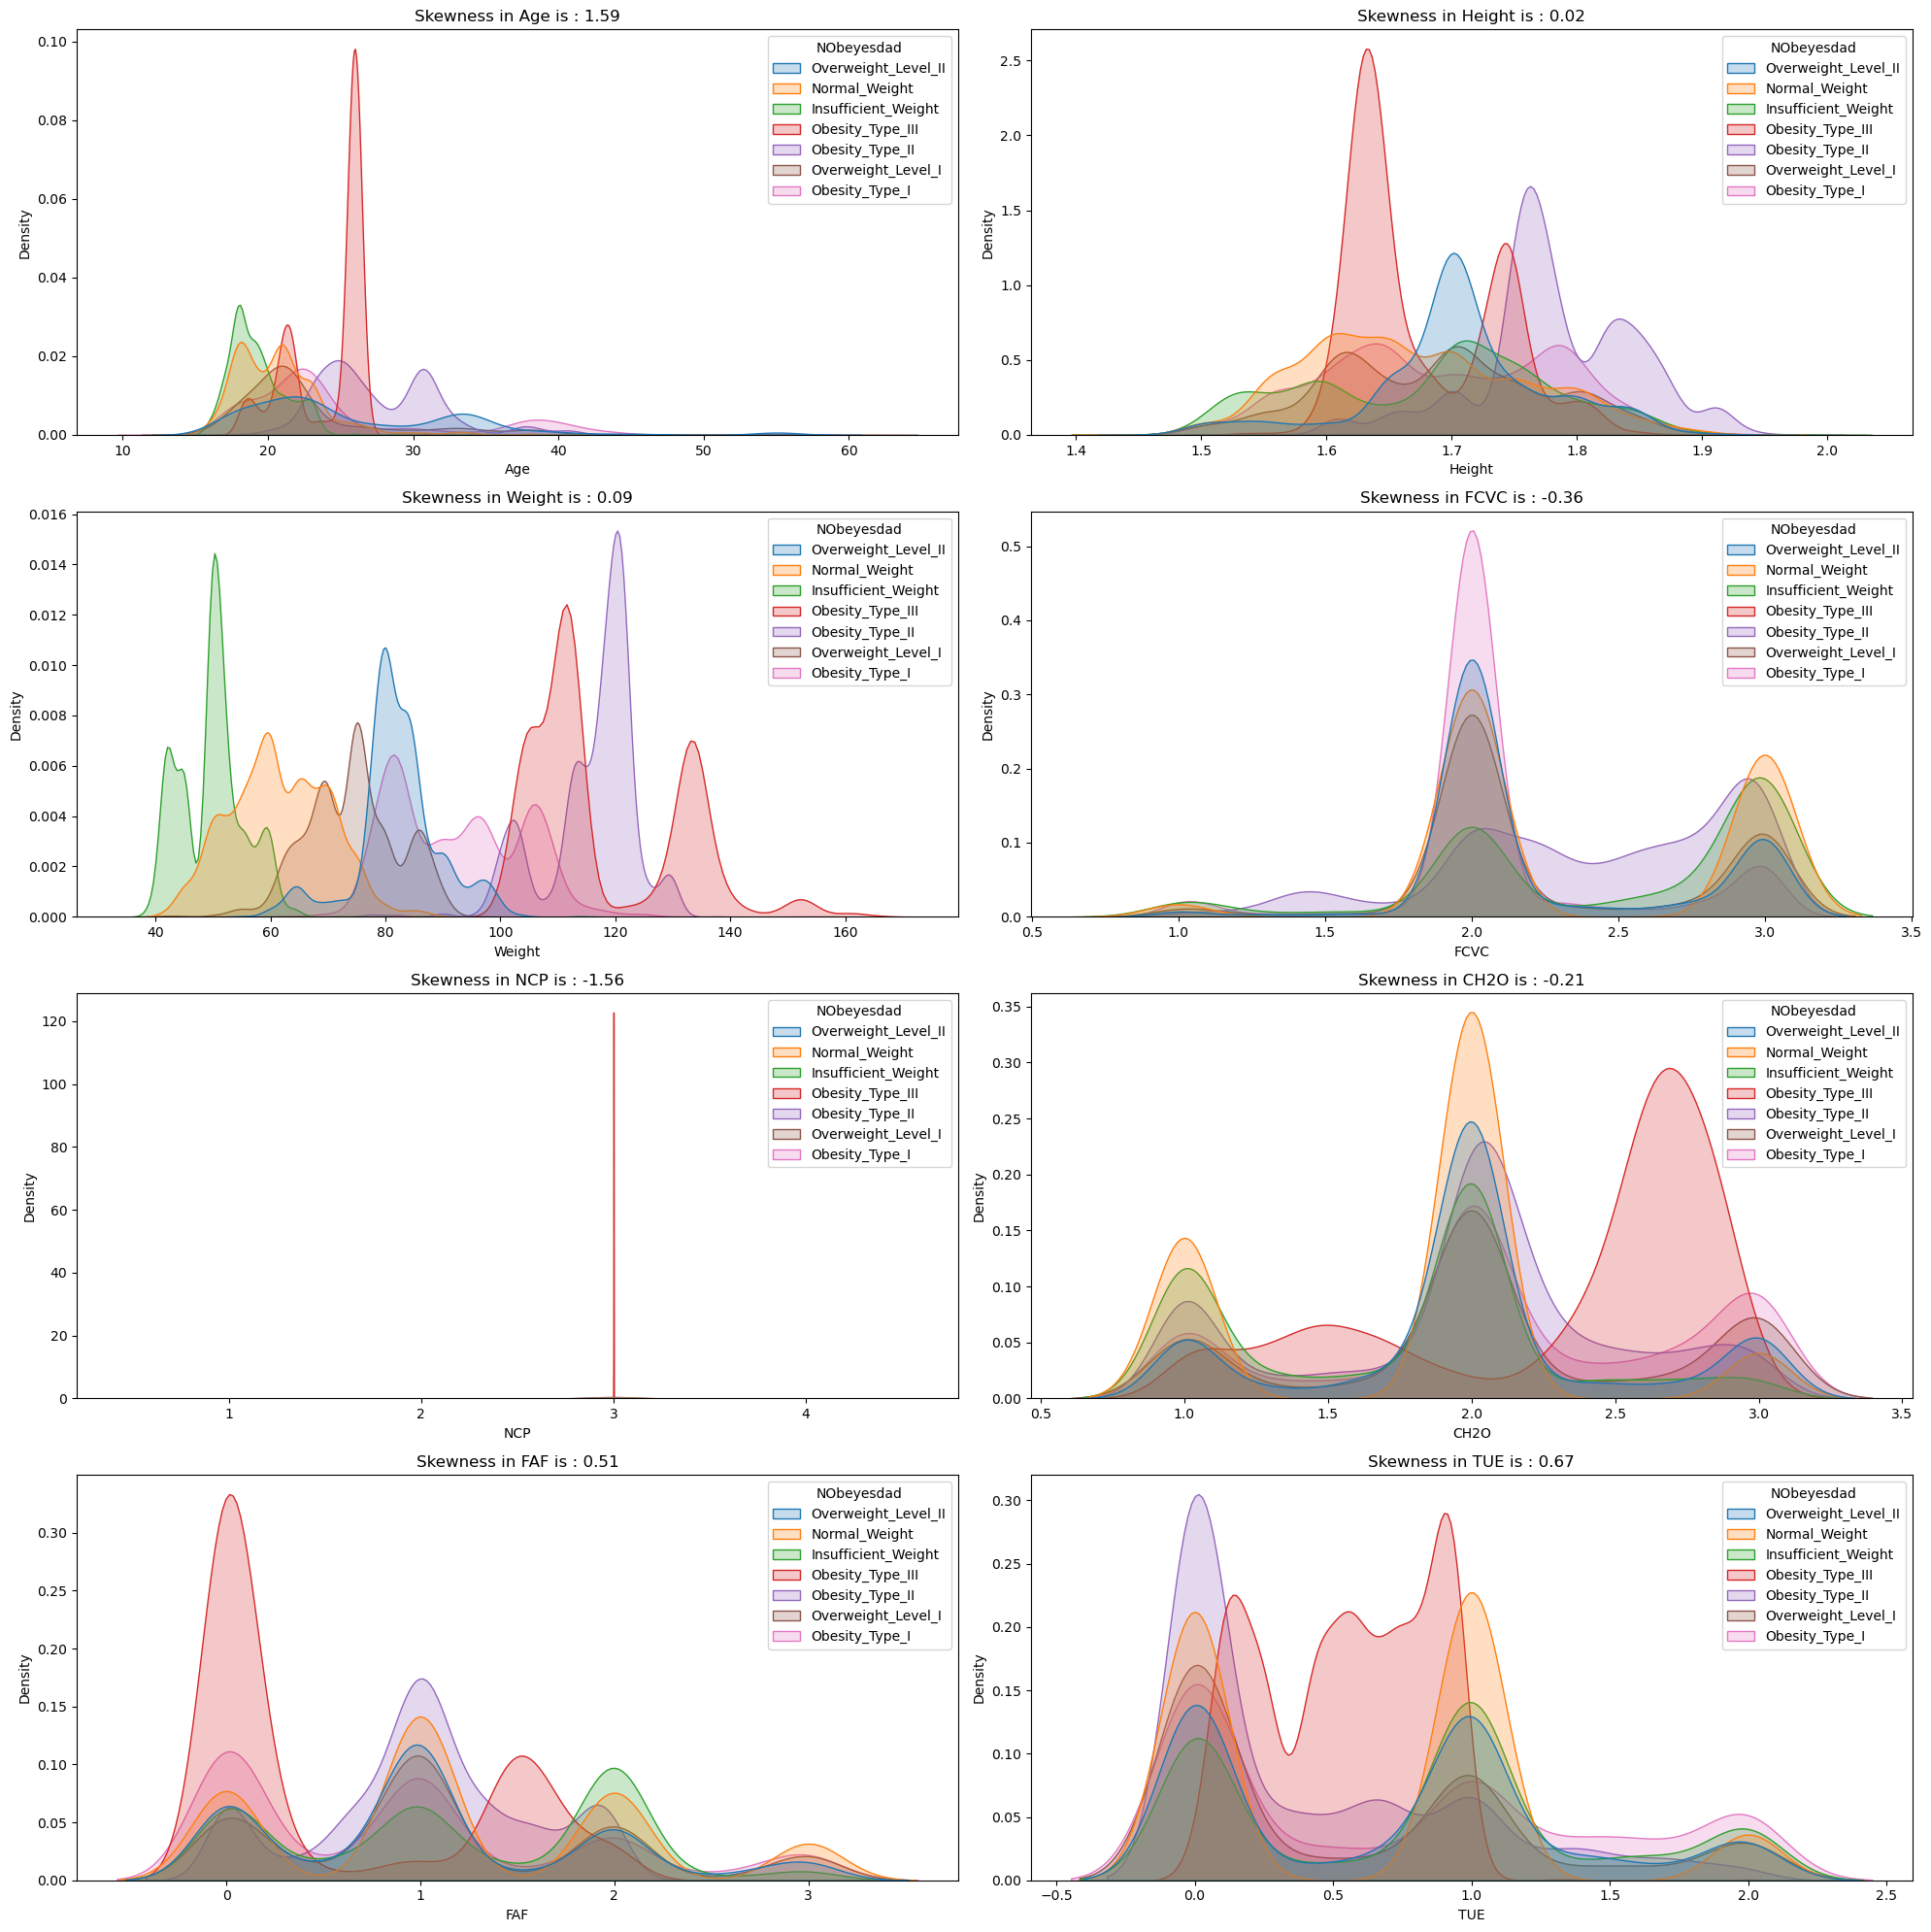

In [11]:
# exploring the distribution of the numerical columns
t=1
rows=4
cols=2
plt.figure(figsize=(20,20))
for i in train.select_dtypes(np.number).columns:
    plt.subplot(rows,cols,t)
    sns.kdeplot(data=train,x=i,fill=True,hue='NObeyesdad')
    plt.title(f'Skewness in {i} is : {round(train[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

**Inferences :**
1. people who workout often have normal weight
2. people who don't workout often tends to obesity type 3
3. people who have high tech use time are overweight

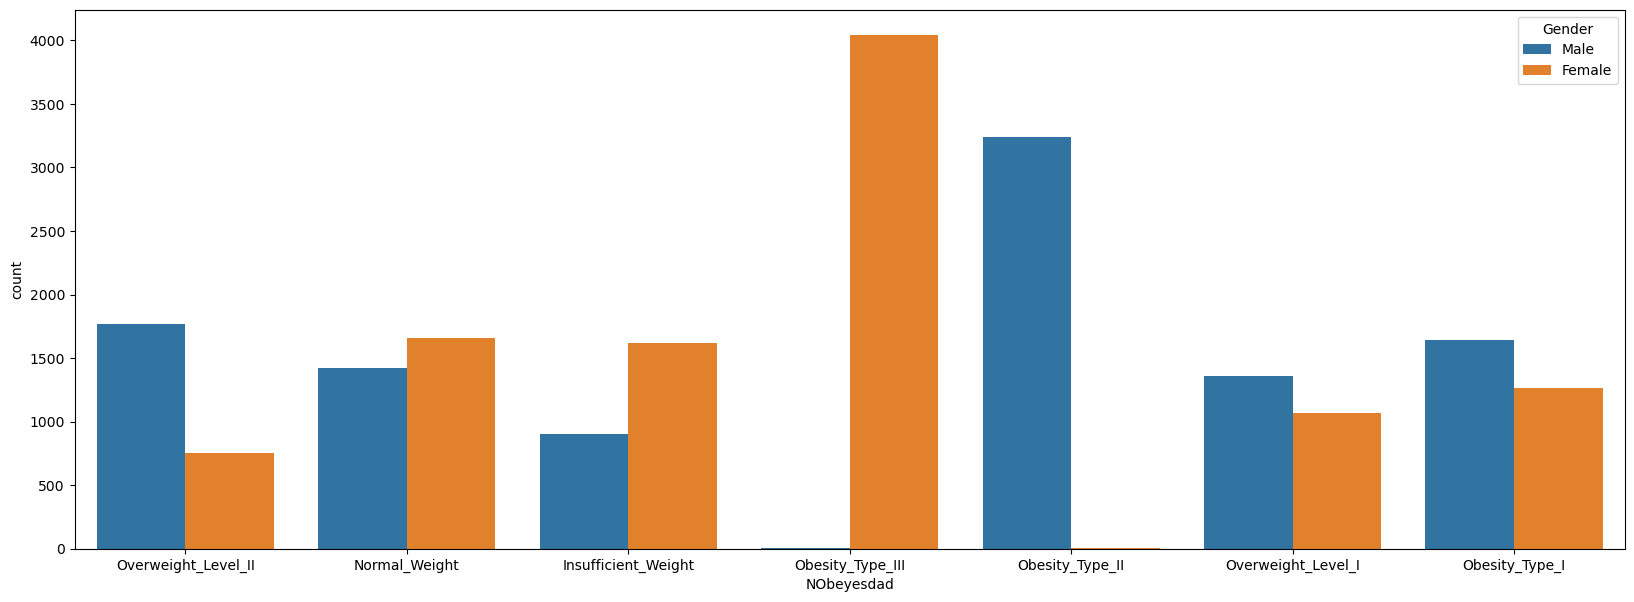

In [38]:
plt.figure(figsize=(20,7))
sns.countplot(data=train,x='NObeyesdad',hue='Gender')
plt.show()

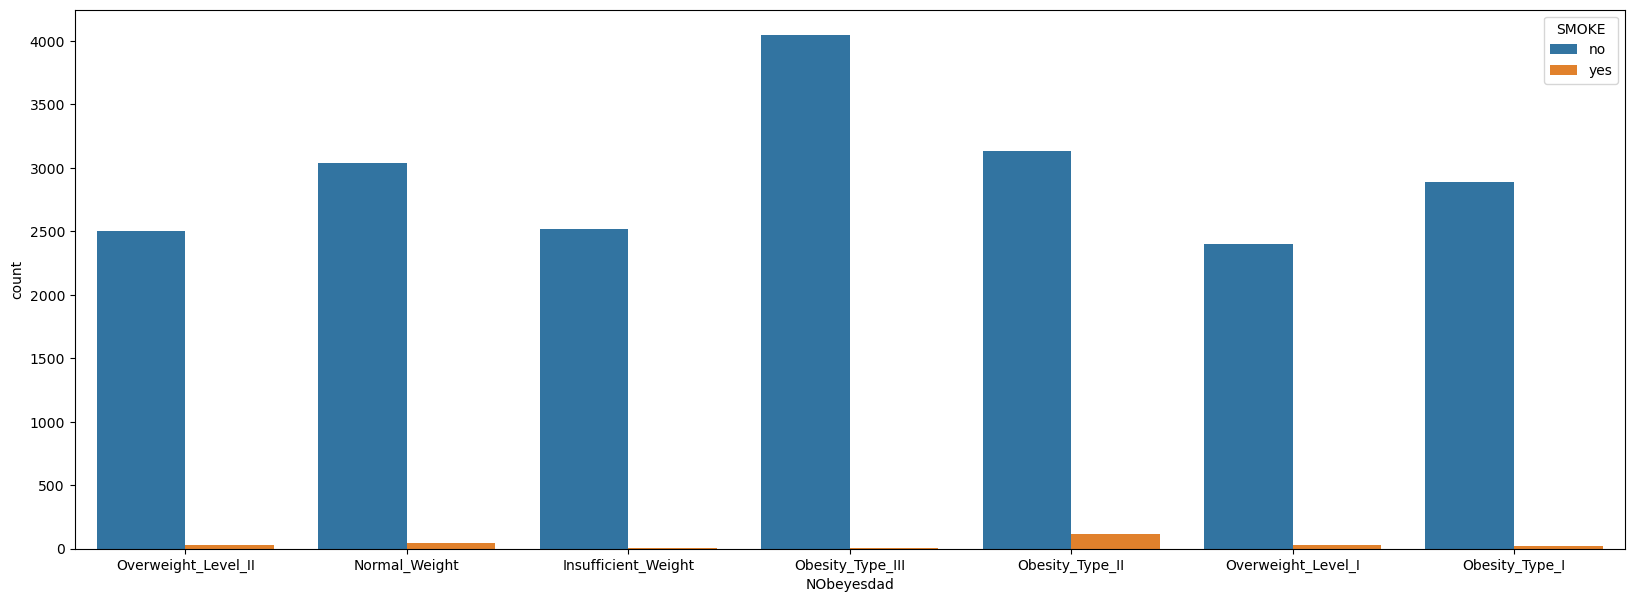

In [42]:
plt.figure(figsize=(20,7))
sns.countplot(data=train,x='NObeyesdad',hue='SMOKE')
plt.show()

## Data Preprocessing

In [25]:
# checking for null values
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [26]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

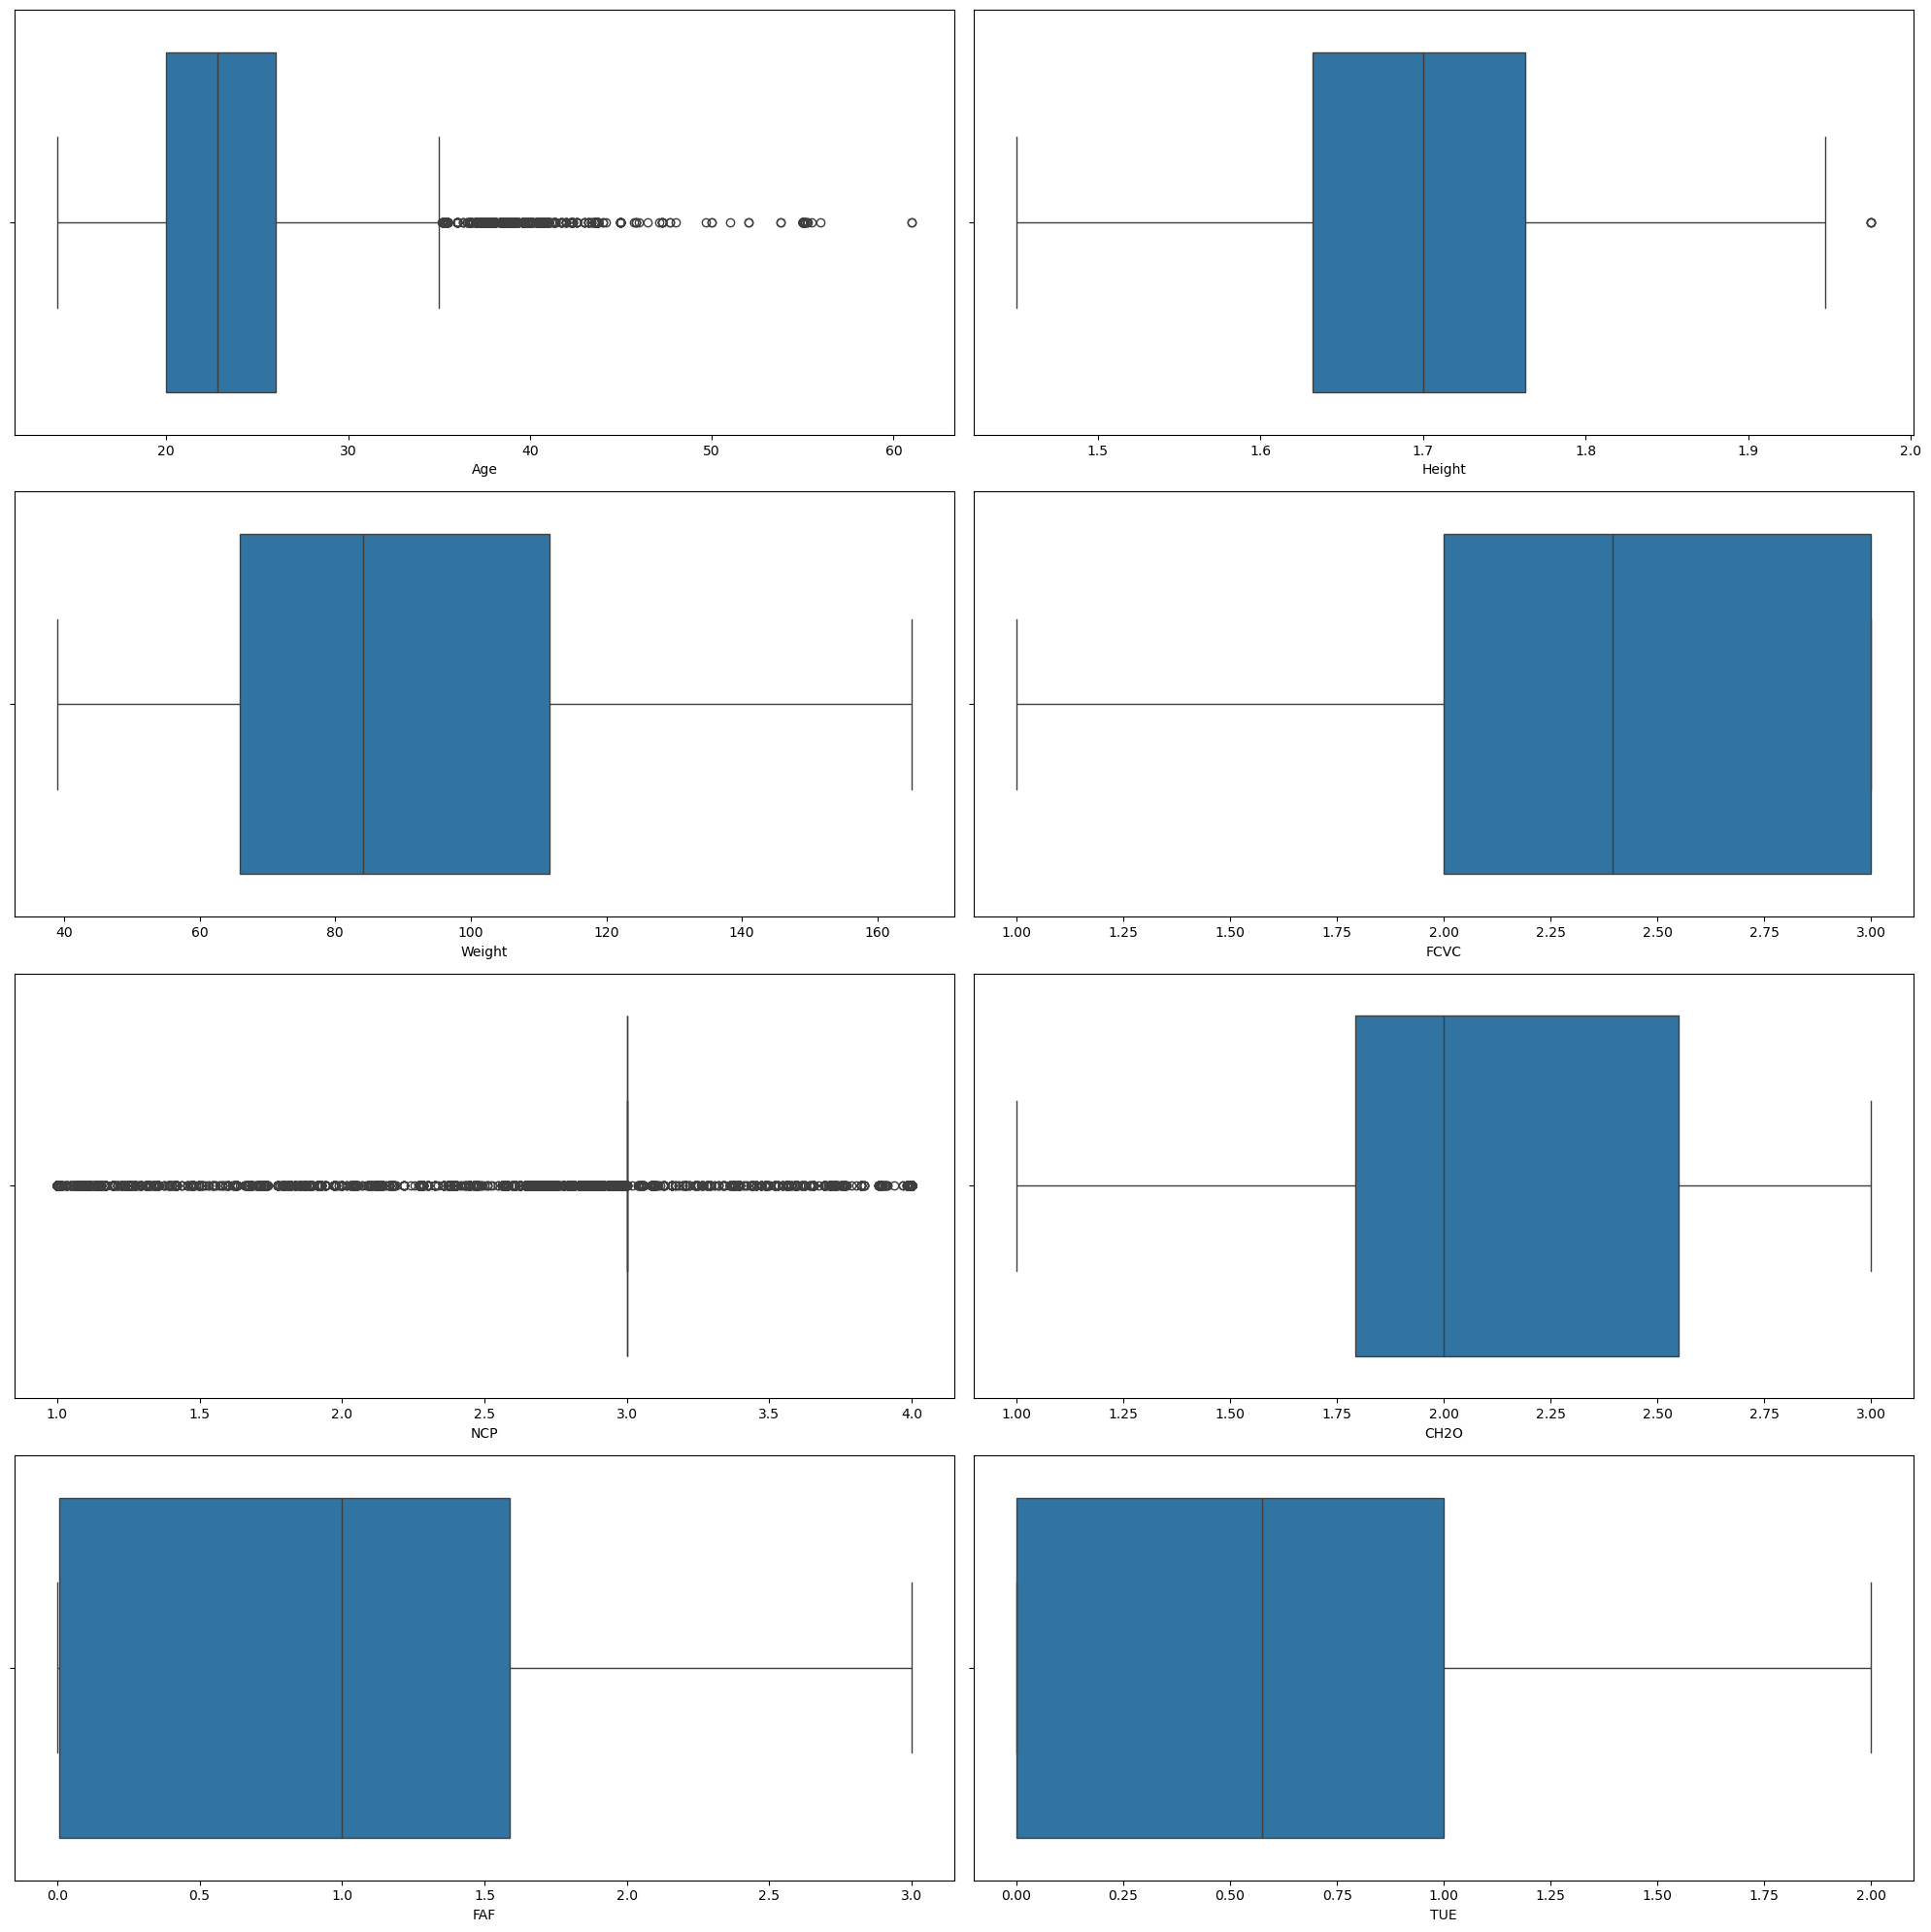

In [27]:
# checking for outliers
t=1
rows=4
cols=2
plt.figure(figsize=(20,20))
for i in train.select_dtypes(np.number).columns:
    plt.subplot(rows,cols,t)
    sns.boxplot(data=train,x=i)
    t+=1
plt.tight_layout()
plt.show()

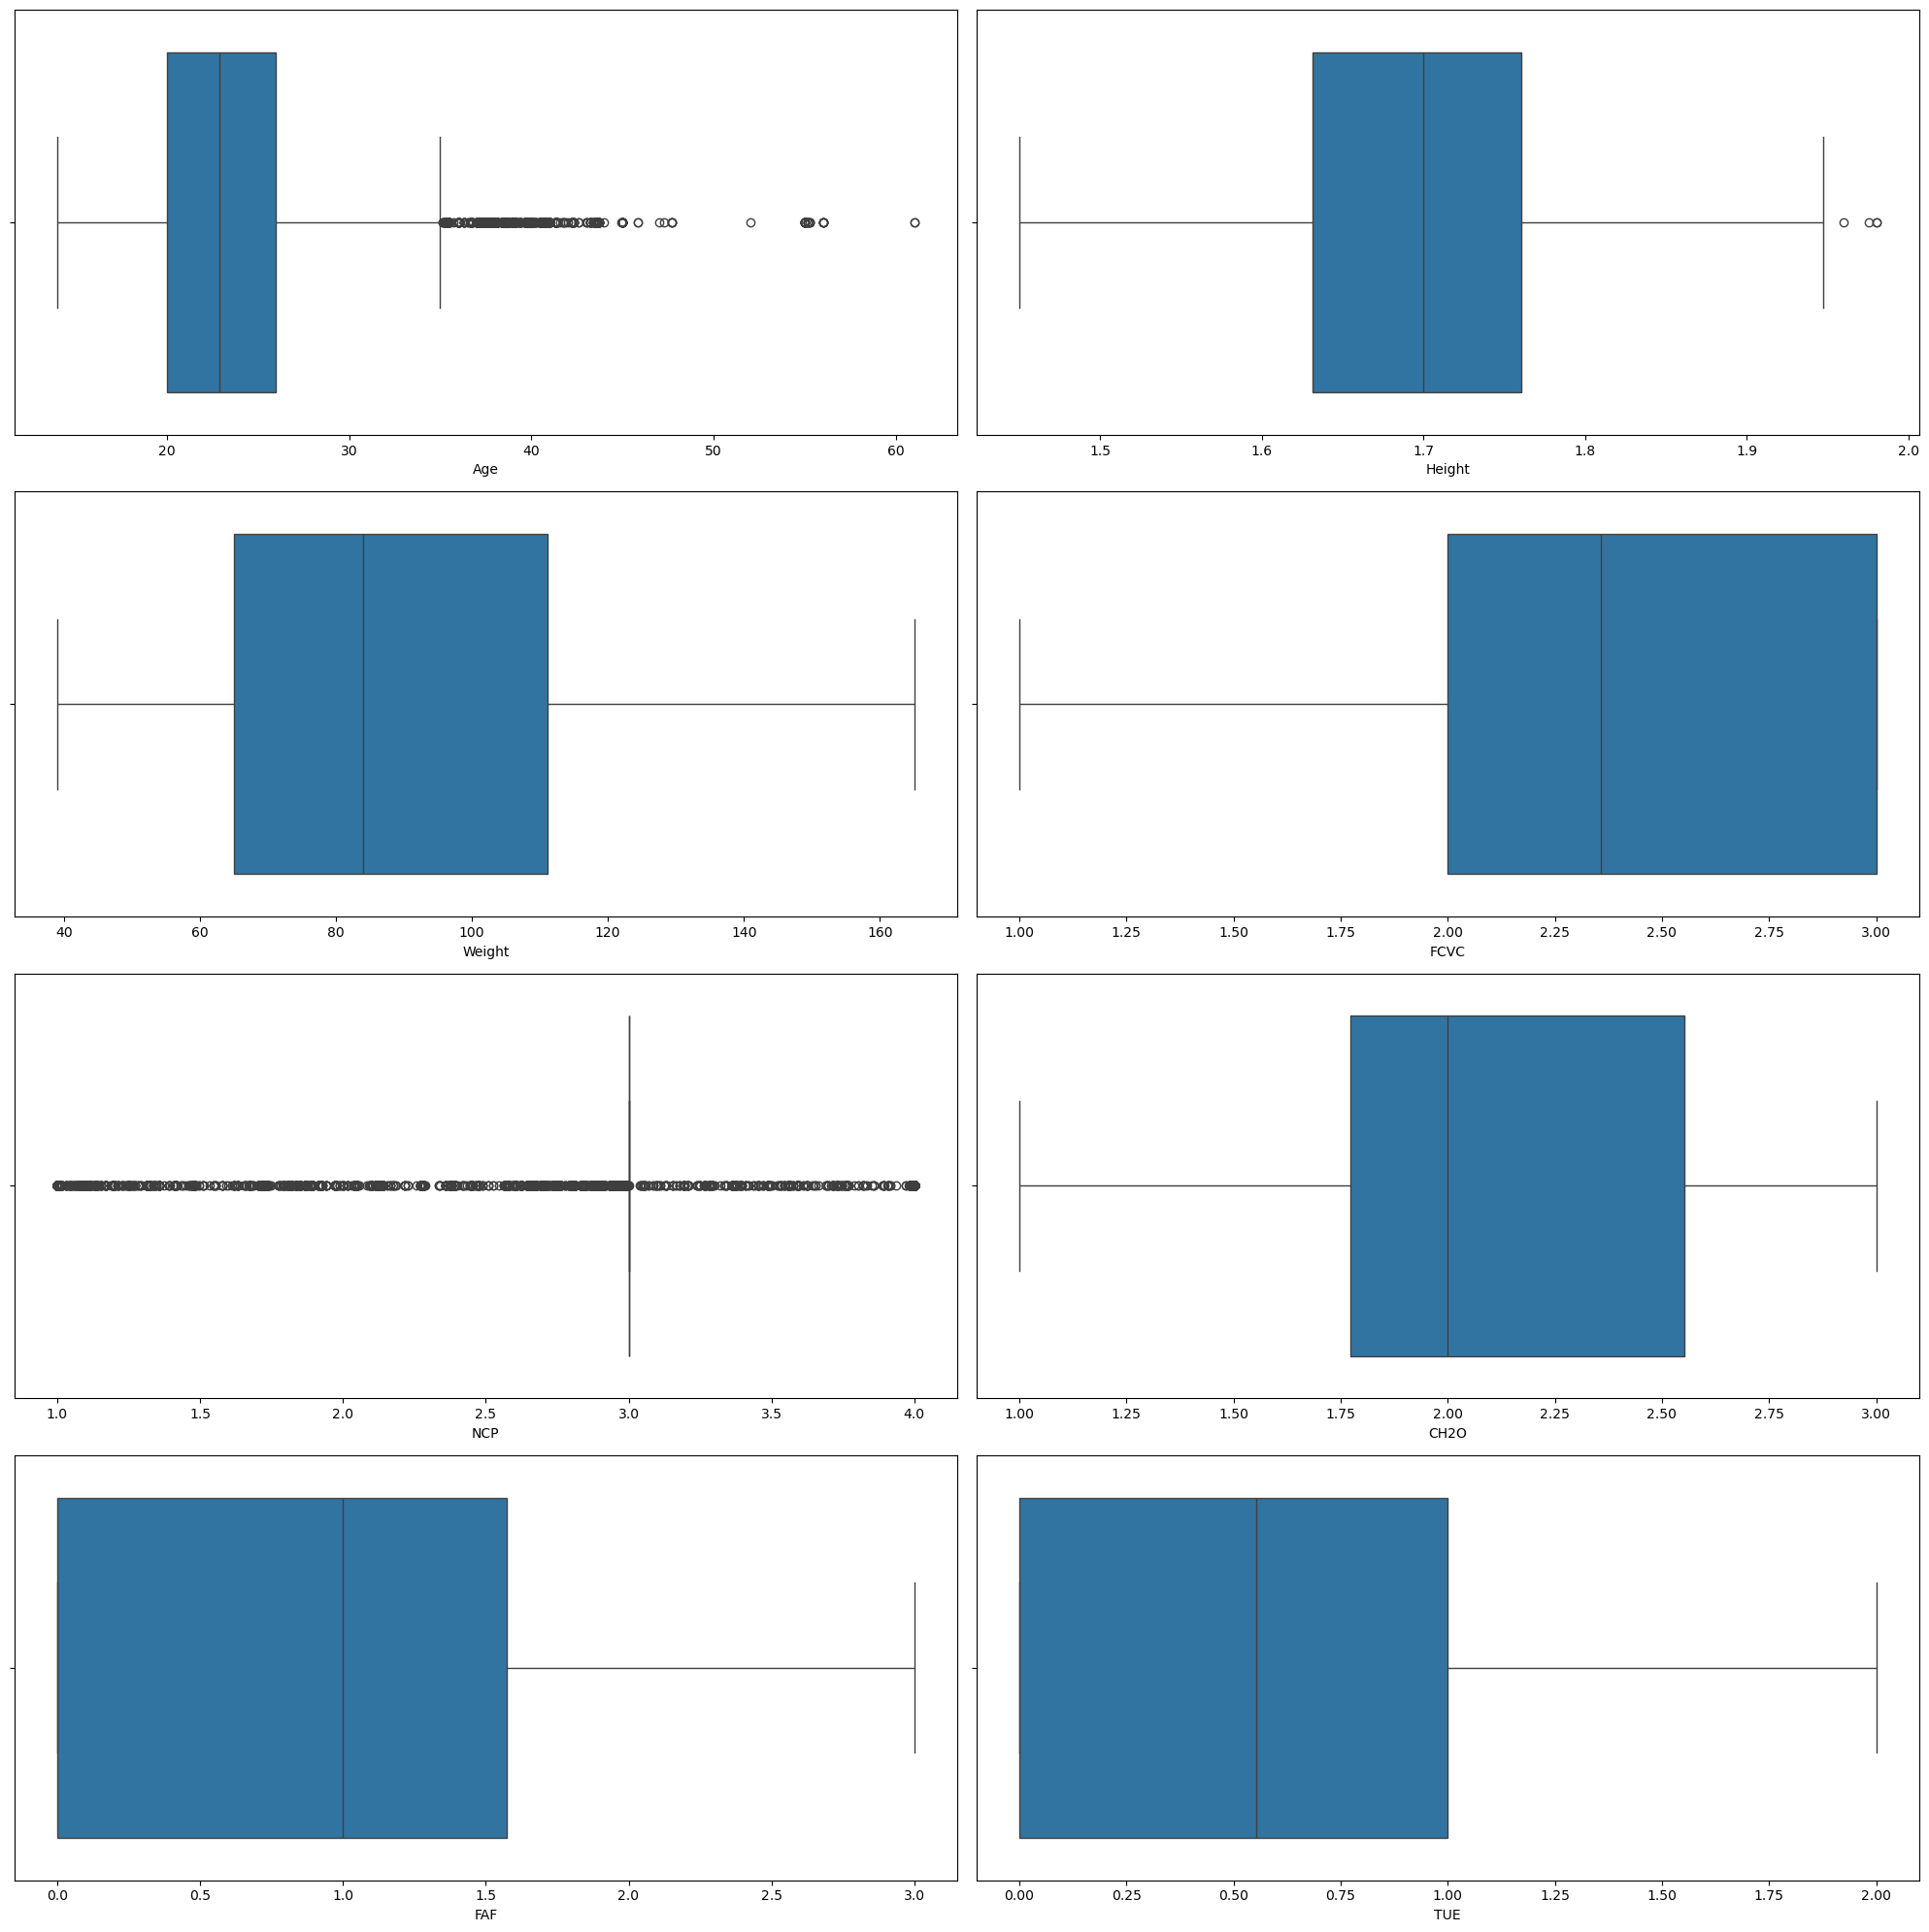

In [28]:
# checking for outliers
t=1
rows=4
cols=2
plt.figure(figsize=(20,20))
for i in train.select_dtypes(np.number).columns:
    plt.subplot(rows,cols,t)
    sns.boxplot(data=test,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [29]:
out={}
for i in train.select_dtypes(np.number).columns:
    mu,sd=train['NCP'].mean(),train['NCP'].std()
    ul,ll=mu+3*sd,mu-3*sd
    out[i]=len(train.loc[train['NCP']<ll,:])

In [30]:
out

{'Age': 0,
 'Height': 0,
 'Weight': 0,
 'FCVC': 0,
 'NCP': 0,
 'CH2O': 0,
 'FAF': 0,
 'TUE': 0}

- by 3 sigma method we can see that there are no outliers

In [31]:
train['BMI']=train['Weight']/(train['Height']**2)

In [32]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841


In [33]:
test['BMI']=test['Weight']/(test['Height']**2)

In [34]:
test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
id,,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,35.315411
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,25.781250
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,41.324115
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,42.976937
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,26.333478
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,24.524346
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,17.652091


In [35]:
# Encoding the columns using label encoding
enc=LabelEncoder()
for i in train.select_dtypes(object).columns:
    train[i]=enc.fit_transform(train[i])

In [36]:
# Encoding the columns using label encoding
for i in test.select_dtypes(object).columns:
    test[i]=enc.fit_transform(test[i])

In [37]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
id,,,,,,,,,,,,,,,,,,
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6,25.599151


## Model fitting

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,
                              BaggingClassifier,VotingClassifier,StackingClassifier)
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
                             f1_score,cohen_kappa_score,cohen_kappa_score,
                             confusion_matrix,classification_report,roc_auc_score,
                             roc_curve)
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [39]:
x=train.drop(columns='NObeyesdad')
y=train['NObeyesdad']

In [40]:
y.value_counts(normalize=True)*100

NObeyesdad
4    19.491280
3    15.646979
1    14.847288
2    14.018692
0    12.154350
6    12.149533
5    11.691878
Name: proportion, dtype: float64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=43)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15568, 17), (5190, 17), (15568,), (5190,))

In [42]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.702504816955684

In [43]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8366088631984586

In [44]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8722543352601156

In [45]:
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.6495183044315992

In [46]:
model=RandomForestClassifier(max_depth=11,n_estimators=150)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8934489402697495

model=GradientBoostingClassifier(max_depth=11,n_estimators=250)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

In [47]:
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8967244701348748

In [48]:
model=BaggingClassifier(n_estimators=210)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8870905587668594

In [49]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.47610789980732177

In [50]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [51]:
model=CatBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

Learning rate set to 0.091018
0:	learn: 1.6156401	total: 292ms	remaining: 4m 51s
1:	learn: 1.4152775	total: 339ms	remaining: 2m 49s
2:	learn: 1.2636596	total: 377ms	remaining: 2m 5s
3:	learn: 1.1475028	total: 414ms	remaining: 1m 43s
4:	learn: 1.0520079	total: 454ms	remaining: 1m 30s
5:	learn: 0.9753579	total: 491ms	remaining: 1m 21s
6:	learn: 0.9091496	total: 533ms	remaining: 1m 15s
7:	learn: 0.8517686	total: 570ms	remaining: 1m 10s
8:	learn: 0.8028760	total: 605ms	remaining: 1m 6s
9:	learn: 0.7601602	total: 639ms	remaining: 1m 3s
10:	learn: 0.7215866	total: 674ms	remaining: 1m
11:	learn: 0.6882002	total: 709ms	remaining: 58.3s
12:	learn: 0.6582493	total: 746ms	remaining: 56.6s
13:	learn: 0.6322379	total: 784ms	remaining: 55.2s
14:	learn: 0.6080197	total: 820ms	remaining: 53.9s
15:	learn: 0.5872997	total: 855ms	remaining: 52.6s
16:	learn: 0.5678701	total: 895ms	remaining: 51.7s
17:	learn: 0.5511191	total: 932ms	remaining: 50.8s
18:	learn: 0.5364794	total: 971ms	remaining: 50.1s
19:	lea

0.8992292870905587

In [52]:
model=LGBMClassifier(max_depth=8)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 15568, number of used features: 17
[LightGBM] [Info] Start training from score -2.107583
[LightGBM] [Info] Start training from score -1.907537
[LightGBM] [Info] Start training from score -1.964517
[LightGBM] [Info] Start training from score -1.854860
[LightGBM] [Info] Start training from score -1.635336
[LightGBM] [Info] Start training from score -2.146381
[LightGBM] [Info] Start training from score -2.107583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.896917148362235

In [53]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8194605009633912

In [54]:
model=MLPClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8560693641618498

final model

In [55]:
model=CatBoostClassifier()
model.fit(x,y)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

Learning rate set to 0.092363
0:	learn: 1.5919961	total: 52.5ms	remaining: 52.5s
1:	learn: 1.3942091	total: 105ms	remaining: 52.2s
2:	learn: 1.2451659	total: 148ms	remaining: 49s
3:	learn: 1.1294464	total: 187ms	remaining: 46.6s
4:	learn: 1.0378963	total: 231ms	remaining: 46s
5:	learn: 0.9577612	total: 279ms	remaining: 46.2s
6:	learn: 0.8923307	total: 317ms	remaining: 44.9s
7:	learn: 0.8354526	total: 373ms	remaining: 46.2s
8:	learn: 0.7876895	total: 415ms	remaining: 45.8s
9:	learn: 0.7464857	total: 455ms	remaining: 45s
10:	learn: 0.7091052	total: 496ms	remaining: 44.6s
11:	learn: 0.6776833	total: 534ms	remaining: 44s
12:	learn: 0.6484974	total: 573ms	remaining: 43.5s
13:	learn: 0.6217263	total: 614ms	remaining: 43.3s
14:	learn: 0.5985016	total: 655ms	remaining: 43s
15:	learn: 0.5774555	total: 695ms	remaining: 42.8s
16:	learn: 0.5579852	total: 734ms	remaining: 42.4s
17:	learn: 0.5415479	total: 772ms	remaining: 42.1s
18:	learn: 0.5253919	total: 814ms	remaining: 42.1s
19:	learn: 0.5110246

0.9504816955684008

In [56]:
test.shape

(13840, 17)

In [57]:
submission.shape

(13840, 2)

In [58]:
pred=model.predict(test)

In [59]:
test['NObeyesdad']=pred

In [60]:
reverse_label_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}


In [61]:
test['NObeyesdad']=test['NObeyesdad'].map(reverse_label_mapping)

In [62]:
test.reset_index(inplace=True)

In [63]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,35.315411,Obesity_Type_II
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,25.781250,Overweight_Level_I
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,41.324115,Obesity_Type_III
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,42.976937,Obesity_Type_I
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,39.584143,Obesity_Type_III


In [64]:
sub=test[['id','NObeyesdad']]

In [65]:
sub.to_csv('sample_submission.csv',index=False)

In [66]:
sub.isna().sum()

id            0
NObeyesdad    0
dtype: int64

In [67]:
sub.shape

(13840, 2)

In [68]:
import pickle

with open('encoder.pkl','wb') as file:
    pickle.dump(enc,file)

with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [69]:
train.shape

(20758, 18)

In [70]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [96]:
model.predict([[
        0,    # encoded_gender (Male)
        21,   # age
        153, # height (in meters)
        250,   # weight (in kg)
        1,    # encoded_family_history (Yes)
        0,    # encoded_favc (No)
        3,    # fcvc (Frequency of vegetables consumption per day)
        3,    # ncp (Number of main meals per day)
        1,    # encoded_caec (Sometimes)
        0,    # encoded_smoke (No)
        2.0,  # ch2o (Consumption of water per day in liters)
        1,    # encoded_scc (Medium physical activity)
        4,    # faf (Frequency of physical activity per week)
        5,    # tue (Time spent on exercise per week in hours)
        1,    # encoded_calc (Yes, consumes alcohol)
        3,    # encoded_mtrans (Public transport)
        45.9  # bmi (Body Mass Index)
    ]]
)[0][0]

4

In [73]:
train['Gender'].value_counts(normalize=True)*100

Gender
0    50.207149
1    49.792851
Name: proportion, dtype: float64

In [72]:
train['NObeyesdad'].unique()

array([6, 1, 0, 4, 3, 5, 2])